C:\Users\geeze\AppData\Local\Temp\ipykernel_11836\2075130200.py:6: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,2

Initial shape: (106301, 293)

First few columns:
['Year', 'Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R']

Missing values before cleaning:
age        445
gender      95
country    121
dtype: int64

Shape after cleaning: (101449, 293)


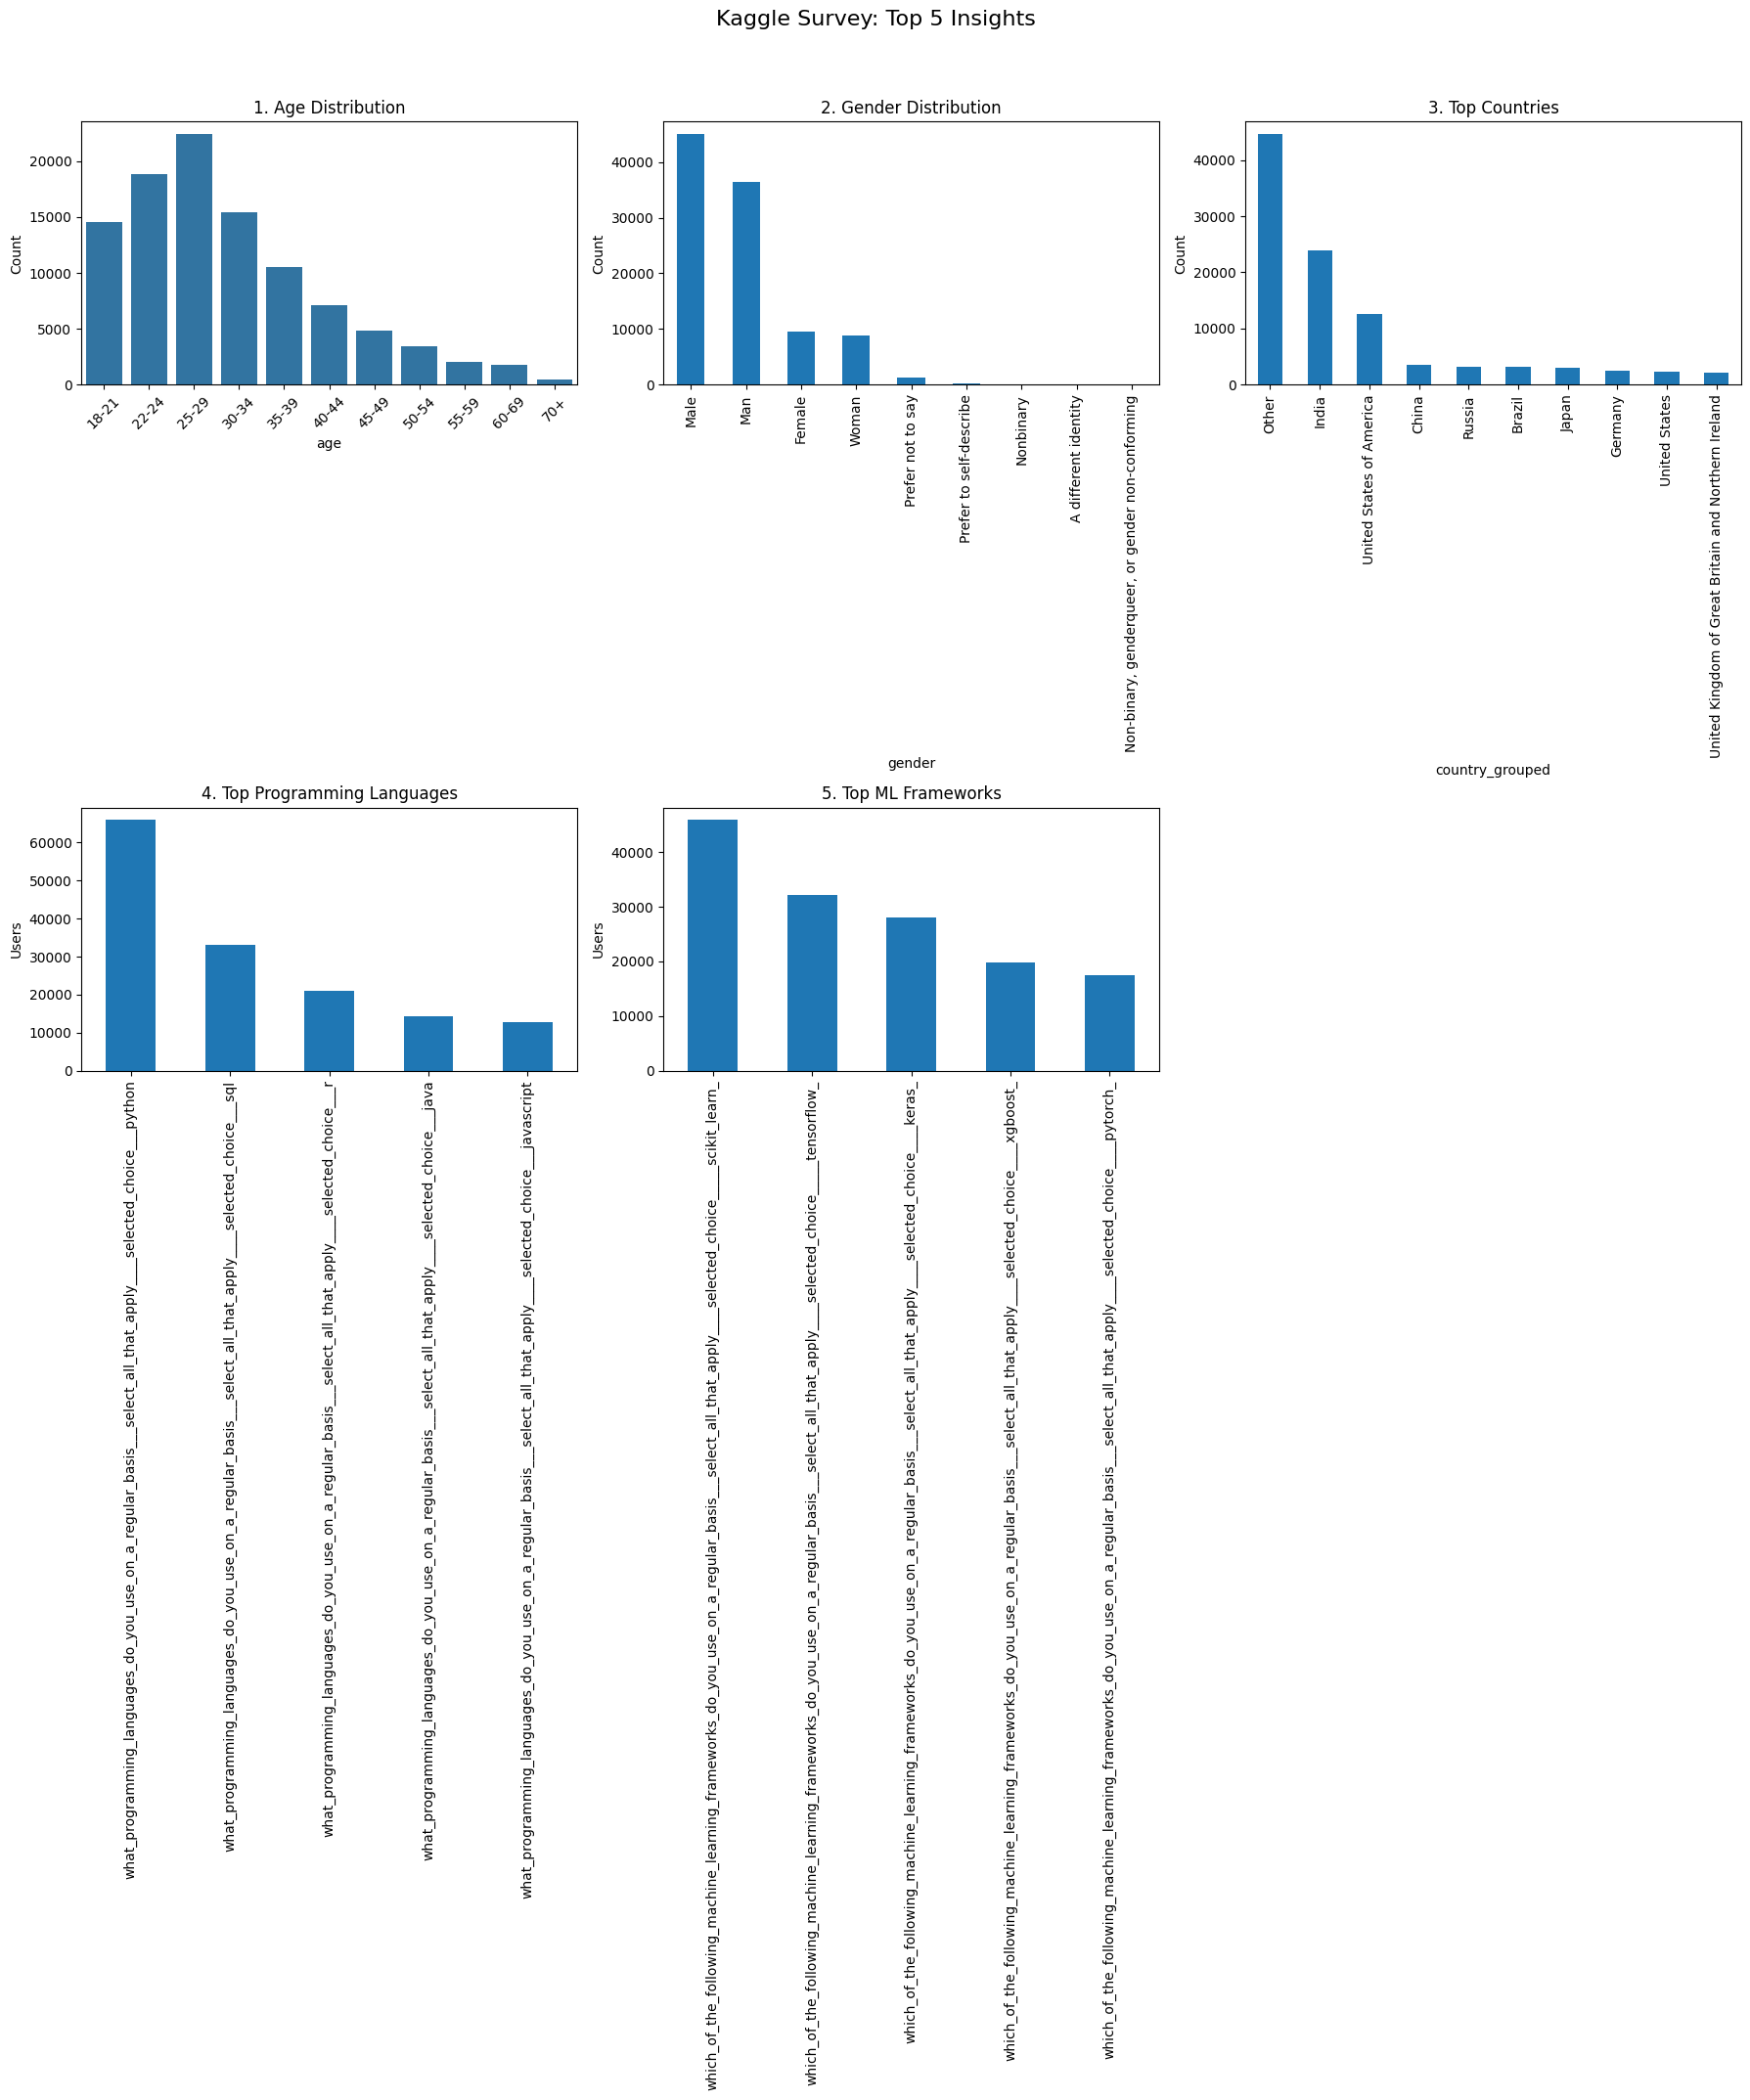

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\geeze\Downloads\kaggle_survey_2017_2021.csv\kaggle_survey_2017_2021.csv", skiprows=1)
print(f"Initial shape: {df.shape}")

# Display first few rows and columns
print("\nFirst few columns:")
print(df.columns.tolist()[:10])


# Identify and rename key columns
column_mapping = {
    'Duration (in seconds)': 'duration',
    'What is your age (# years)?': 'age',
    'What is your gender? - Selected Choice': 'gender',
    'In which country do you currently reside?': 'country',
    'What is the highest level of formal education...': 'education',
    'Select the title most similar to your current role...': 'role',
    'For how many years have you been writing code...': 'coding_experience'
}

df = df.rename(columns=column_mapping)

# Clean remaining column names
df.columns = df.columns.str.lower().str.replace('[^a-z0-9_]', '_', regex=True)

# Handle missing values
print("\nMissing values before cleaning:")
print(df[['age', 'gender', 'country']].isnull().sum())

df = df.dropna(subset=['age', 'gender', 'country'])

# Remove duplicates
df = df.drop_duplicates()

# Clean categorical values
df['gender'] = df['gender'].str.strip()
df['country'] = df['country'].str.strip()
df['age'] = df['age'].str.strip()

print(f"\nShape after cleaning: {df.shape}")


# Age encoding (ordinal)
age_order = ['18-21', '22-24', '25-29', '30-34', '35-39', 
             '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
df['age_encoded'] = pd.Categorical(df['age'], categories=age_order, ordered=True).codes

# Gender encoding
gender_mapping = {
    'Man': 0,
    'Woman': 1,
    'Nonbinary': 2,
    'Prefer to self-describe': 3,
    'Prefer not to say': 4
}
df['gender_encoded'] = df['gender'].map(gender_mapping)

# Country grouping (top 10 countries + others)
top_countries = df['country'].value_counts().head(10).index
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

# 1. Age Distribution
age_dist = df['age'].value_counts().reindex(age_order)

# 2. Gender Distribution
gender_dist = df['gender'].value_counts()

# 3. Top Countries
country_dist = df['country_grouped'].value_counts()

# 4. Popular Programming Languages
lang_cols = [col for col in df.columns if 'programming_languages' in col and 'selected_choice' in col]
lang_dist = df[lang_cols].notna().sum().sort_values(ascending=False).head(5)

# 5. ML Framework Usage
ml_cols = [col for col in df.columns if 'machine_learning_frameworks' in col and 'selected_choice' in col]
ml_dist = df[ml_cols].notna().sum().sort_values(ascending=False).head(5)


plt.figure(figsize=(18, 21))
plt.suptitle('Kaggle Survey: Top 5 Insights', fontsize=16, y=1.02)

# Insight 1: Age Distribution
plt.subplot(2, 3, 1)
sns.barplot(x=age_dist.index, y=age_dist.values)
plt.title('1. Age Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Insight 2: Gender Distribution
plt.subplot(2, 3, 2)
gender_dist.plot(kind='bar')
plt.title('2. Gender Distribution')
plt.ylabel('Count')

# Insight 3: Top Countries
plt.subplot(2, 3, 3)
country_dist.plot(kind='bar')
plt.title('3. Top Countries')
plt.ylabel('Count')
# plt.xticks(rotation=45)

# Insight 4: Top Programming Languages
plt.subplot(2, 3, 4)
lang_dist.plot(kind='bar')
plt.title('4. Top Programming Languages')
plt.ylabel('Users')
# plt.xticks(rotation=45)

# Insight 5: Top ML Frameworks
plt.subplot(2, 3, 5)
ml_dist.plot(kind='bar')  # pyright: ignore[reportUndefinedVariable]
plt.title('5. Top ML Frameworks')
plt.ylabel('Users')
# plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('kaggle_survey_insights.png', bbox_inches='tight')
plt.show()

# Education vs. Compensation
if 'what_is_your_current_yearly_compensation' in df.columns:
    edu_comp = df.groupby(['education', 'what_is_your_current_yearly_compensation']).size().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(edu_comp, cmap='YlGnBu', annot=True, fmt='g')
    plt.title('Education vs. Compensation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Experience vs. Role
if 'role' in df.columns and 'coding_experience' in df.columns:
    exp_role = df.groupby(['coding_experience', 'role']).size().unstack()
    plt.figure(figsize=(12, 8))
    sns.heatmap(exp_role, cmap='YlGnBu', annot=True, fmt='g')
    plt.title('Coding Experience vs. Role')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()